In [212]:
import pandas as pd
import sklearn.model_selection as skmods
import sklearn.linear_model as sklinmod
import seaborn as sns
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline
folder = 'Data/'

cars = pd.read_csv(folder+'Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [213]:
# check correlations
cars[['Weight','MPG.highway']].corr()

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


Text(0, 0.5, 'MPG (Highway)')

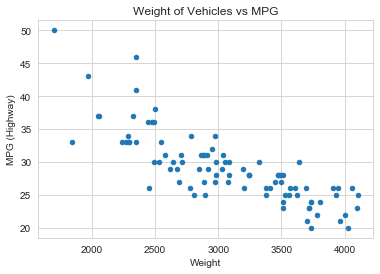

In [214]:
# make scatter plot
sns.set_style('whitegrid')

ax = cars.plot(title='Weight of Vehicles vs MPG',kind='scatter',x='Weight',y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')




In [215]:
# calculate linear regression line
x = np.asarray(cars['Weight'])
y = np.asarray(cars['MPG.highway'])

slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

# display factors
line = Rf'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

# add slope to line
ax.plot(x,intercept+slope*x,label=line,color='r')

# set up legend
ax.legend(facecolor='white')

# show the plot
plt.show()

In [216]:
cars.info()
cars[cars['Rear.seat.room'].isna()]

print(len(cars['Man.trans.avail'].unique()))

cars.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000
mean,47.000000,17.125806,19.509677,21.898925,22.365591,29.086022,2.667742,143.827957,5280.645161,2332.204301,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226
std,26.990739,8.746029,9.659430,11.030457,5.619812,5.331726,1.037363,52.374410,596.731690,496.506525,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510
min,1.000000,6.700000,7.400000,7.900000,15.000000,20.000000,1.000000,55.000000,3800.000000,1320.000000,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000
25%,24.000000,10.800000,12.200000,14.700000,18.000000,26.000000,1.800000,103.000000,4800.000000,1985.000000,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000
50%,47.000000,14.700000,17.700000,19.600000,21.000000,28.000000,2.400000,140.000000,5200.000000,2340.000000,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000
75%,70.000000,20.300000,23.300000,25.300000,25.000000,31.000000,3.300000,170.000000,5750.000000,2565.000000,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000
max,93.000000,45.400000,61.900000,80.000000,46.000000,50.000000,5.700000,300.000000,6500.000000,3755.000000,27.000000,8.000000,219.000000,119.000000,78.000000,45.000000,36.000000,22.000000,4105.000000


In [217]:
print(cars['Unnamed: 0'])

0      1
1      2
2      3
3      4
4      5
      ..
88    89
89    90
90    91
91    92
92    93
Name: Unnamed: 0, Length: 93, dtype: int64


In [218]:
# can drop model, make and Unnamed index column, unique for every entry
# for now lets also drop luggage room, not sure of a good way to handle it
cars = cars.drop(['Model','Make','Unnamed: 0','Luggage.room'],axis=1)


In [219]:
# replace seat room nulls with minimum value
mini = min(cars['Rear.seat.room'].unique())

cars['Rear.seat.room'].fillna(mini,inplace=True)

cars.Cylinders.iloc[cars.Cylinders == 'rotary'] = '2'
cars.Cylinders = cars.Cylinders.astype(int)


C:\Users\cbevr\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [220]:
# apply get dummies to all remaining categorical columns
cars.info()
cars = pd.get_dummies(cars,columns=['Manufacturer','Type','AirBags','DriveTrain','Man.trans.avail','Origin'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Type                93 non-null     object 
 2   Min.Price           93 non-null     float64
 3   Price               93 non-null     float64
 4   Max.Price           93 non-null     float64
 5   MPG.city            93 non-null     int64  
 6   MPG.highway         93 non-null     int64  
 7   AirBags             93 non-null     object 
 8   DriveTrain          93 non-null     object 
 9   Cylinders           93 non-null     int32  
 10  EngineSize          93 non-null     float64
 11  Horsepower          93 non-null     int64  
 12  RPM                 93 non-null     int64  
 13  Rev.per.mile        93 non-null     int64  
 14  Man.trans.avail     93 non-null     object 
 15  Fuel.tank.capacity  93 non-null     float64
 16  Passengers

In [221]:
# separate out mpg.highway as target
targetcol = 'MPG.highway'
X = cars
y = cars[targetcol]
X.drop(targetcol,axis=1,inplace=True)

# separate train and test sets
X_train, X_test, y_train, y_test = skmods.train_test_split(X,y,test_size=0.25,random_state=0)


# run linear regression on X_train and y_train
mod = sklinmod.LinearRegression()

# fit to training data
mod.fit(X_train,y_train)

# show calculated coefficients
mod.coef_

# run model on test set
print(mod.predict(X_test))
print(y_test)

ax = plt.plot
# get score
# mod.score(X_test,y_test)


[29.15625266 34.20405252 26.80019647 20.20557269 28.49996473 27.87968861
 35.57711099 33.00329623 23.11134684 28.27949939 34.27349594 27.90479826
 16.58308253 26.33924892 35.2296963  32.99130073 31.91557    35.47040929
 28.39763229 29.96587416 24.90475103 33.09677951 27.37237028 32.87728096]
2     26
30    33
55    24
16    20
13    28
51    26
61    33
45    34
33    29
77    26
78    38
7     25
56    25
66    26
43    33
59    26
8     27
22    33
68    31
92    28
26    27
42    31
24    27
6     28
Name: MPG.highway, dtype: int64
